In [20]:
"""
Get the internal variability of one input to STORM
"""

from MachineLearning.dataset import get_dataset
import numpy as np

data_dir = "/nesi/project/uoa03669/ewin313/storm_data/constant_inputs/"
data_dir_dif_inputs = "/nesi/project/uoa03669/ewin313/storm_data/v5/"

ds = get_dataset(data_dir, data_version=4, dataset="test", batch_size=25)

outputs_ds = ds.map(lambda x, y: y)
    
outputs = np.empty(shape=(0, 110, 210, 1))
for output in outputs_ds.as_numpy_iterator():
    outputs = np.concatenate([outputs, output])

ds_dif_inputs = get_dataset(data_dir_dif_inputs, data_version=4, dataset="test", batch_size=25)
outputs_diff_input_ds = ds_dif_inputs.map(lambda x, y: y)
        
outputs_dif_inputs = np.empty(shape=(0, 110, 210, 1))
for output in outputs_diff_input_ds.as_numpy_iterator():
    outputs_dif_inputs = np.concatenate([outputs_dif_inputs, output])


/nesi/project/uoa03669/ewin313/storm_data/constant_inputs/AllData_1718240914.763389.hdf5
/nesi/project/uoa03669/ewin313/storm_data/constant_inputs/AllData_1718239705.2317216.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717569136.1850202.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.7376506.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.5460758.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.638054.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568341.0711763.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.633827.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.5788093.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568222.8476062.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568114.8498118.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717569633.8104084.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_

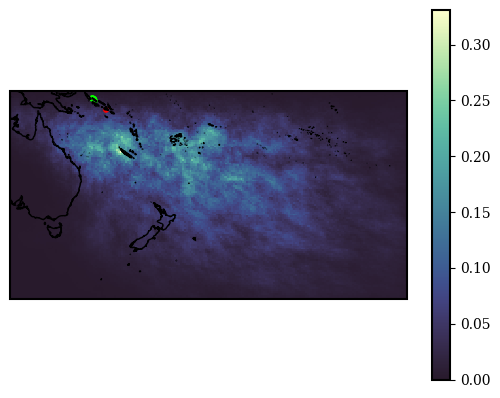

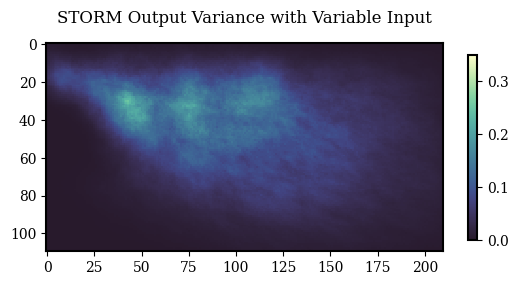

In [114]:
import matplotlib.pyplot as plt
from TrainingDataGeneration.PlotMapData import plotLatLonGridData
sites = Sites().sites
sites_10 = sites[:10]
weights = [10 for i in range(10)]
point_colors = [[1, 0, 0]] + [[0.035, 1, 0] for i in range(9)]
plt.rcParams["font.family"] = "serif"

plotLatLonGridData(np.squeeze(np.var(outputs, axis=0), axis=-1), 0.5, points=sites_10, point_weight=weights, point_colors=point_colors)

plt.title("STORM Output Variance with Variable Input", pad=15, fontsize=12)
plt.imshow(np.var(outputs_dif_inputs, axis=0), vmin=0, vmax=.35)
plt.colorbar(shrink=0.5)
plt.show()

<Axes: ylabel='Count'>

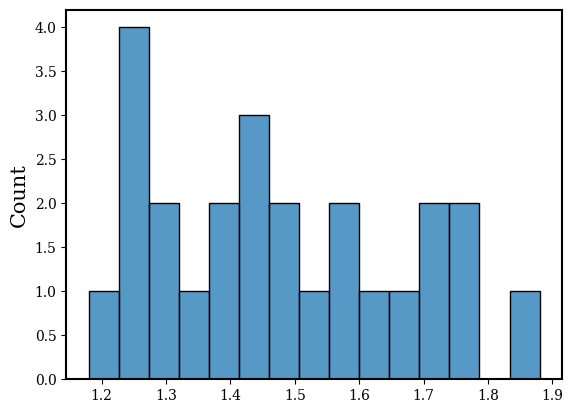

In [105]:
from MachineLearning.Evaluation.evaluation_utils import get_many_site_values
from MachineLearning.Evaluation.figures import example_site_ensemble_boxplot_figure
import seaborn as sns
plt.rcParams["font.family"] = "serif"

site_vals = get_many_site_values(outputs)
site_vals_diff_inputs = get_many_site_values(outputs_dif_inputs)
#all_site_outputs = {"STORM Constant Input": site_vals, "STORM Different Inputs": site_vals_diff_inputs}

#example_site_ensemble_boxplot_figure(all_site_outputs)

sns.histplot(site_vals[:,0], bins=15)


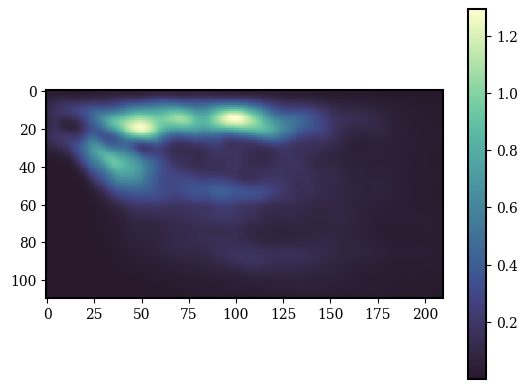

In [110]:
### Local Variance

from scipy.signal import convolve2d

def compute_local_variance(matrix, window_size):
    variance_matrix = np.zeros(output.shape)

    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[2]):
            local_window_x_min = max(0, i - window_size // 2)
            local_window_x_max = min(matrix.shape[1], i + window_size // 2)
            local_window_y_min = max(0, j - window_size // 2)
            local_window_y_max = min(matrix.shape[2], j + window_size // 2)

            local_vals = matrix[:,local_window_x_min:local_window_x_max + 1, local_window_y_min:local_window_y_max + 1]
            variance_matrix[i,j] = np.var(local_vals)
            
    return variance_matrix

variance_matrices = compute_local_variance(np.squeeze(outputs,axis=-1), 11)

plt.imshow(variance_matrices)
plt.colorbar()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


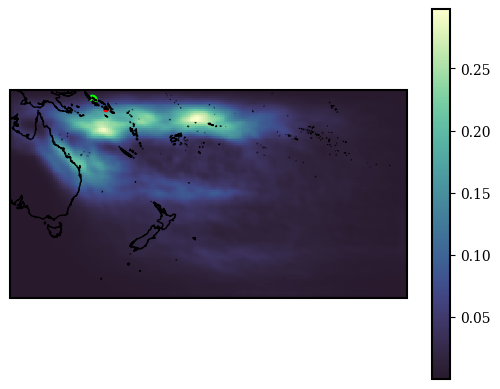

In [97]:
%load_ext autoreload
%autoreload 2

from HealthFacilities.getHealthFacilityData import Sites
from TrainingDataGeneration.PlotMapData import plotLatLonGridData
sites = Sites().sites
sites_10 = sites[:10]
weights = [10 for i in range(10)]
point_colors = [[1, 0, 0]] + [[0.035, 1, 0] for i in range(9)]
plotLatLonGridData(np.mean(variance_matrices, axis=0), 0.5, points=sites_10, point_weight=weights, point_colors=point_colors)

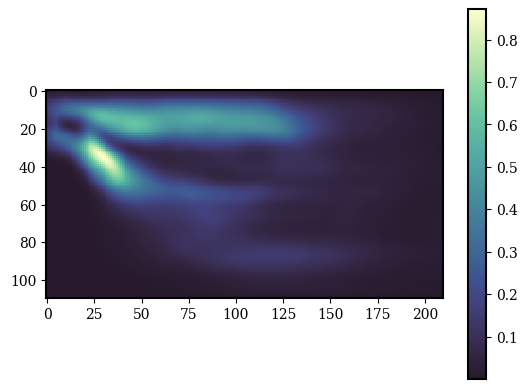

In [50]:
variance_matrices = [compute_local_variance(np.squeeze(output,axis=-1), 10) for output in outputs_dif_inputs]

plt.imshow(np.mean(variance_matrices, axis=0))
plt.colorbar()

In [87]:

test_mat = np.random.normal(size=(110, 210))

test_var = compute_local_variance(test_mat, 5)

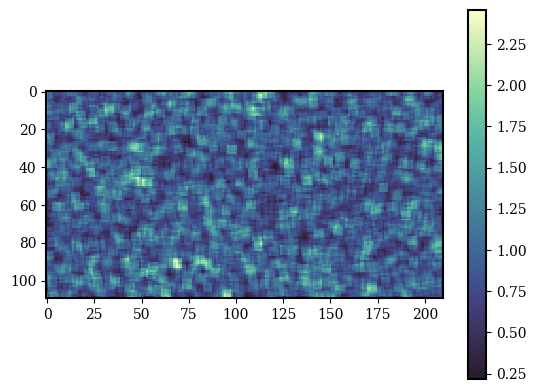

In [89]:
plt.imshow(test_var)
plt.colorbar()

In [95]:
test_var_2 = compute_local_variance(test_mat, 15)

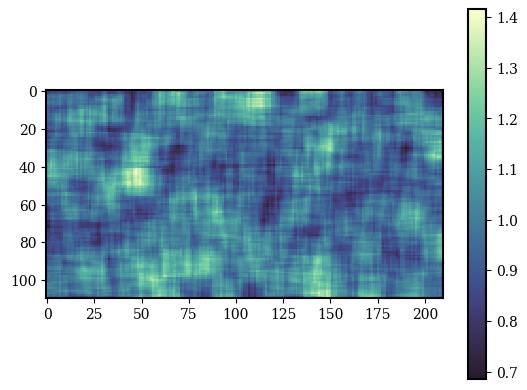

In [96]:
plt.imshow(test_var_2)
plt.colorbar()

In [7]:
from MachineLearning.dataset import get_dataset
import numpy as np
from MachineLearning.NearestNeighbors.nearest_neighbors import NearestNeighborsRegressor
import os

eval_data_dir = "/nesi/project/uoa03669/ewin313/storm_data/constant_inputs"
eval_data_dir2 = "/nesi/project/uoa03669/ewin313/storm_data/include_historical"
__location__ = "/nesi/project/uoa03669/ewin313/TropicalCycloneAI/"
test_data_nearest_neighbors_constant = get_dataset(
        eval_data_dir, data_version=5, dataset="test", batch_size=32
    )
test_data_nearest_neighbors_variable = get_dataset(
    eval_data_dir2, data_version=5, dataset="test", batch_size=32
)
nearest_neighbor_inputs_constant_ds = test_data_nearest_neighbors_constant.map(lambda x, y: x)

nearest_neighbor_inputs_variable_ds = test_data_nearest_neighbors_variable.map(lambda x, y: x)
                                                        
nearest_neighbor_inputs_constant = np.concatenate(list(nearest_neighbor_inputs_constant_ds.as_numpy_iterator()))

nearest_neighbor_inputs_variable = np.concatenate(list(nearest_neighbor_inputs_variable_ds.as_numpy_iterator()))

nearest_neighbors_regressor = NearestNeighborsRegressor("/nesi/project/uoa03669/ewin313/storm_data/v5")
    
nearest_neighbors_regressor.load(
    os.path.join(__location__, "MachineLearning/NearestNeighbors/nearest_neighbors.pkl")
)

NearestNeighbors()

In [30]:
actual_outputs_constant = test_data_nearest_neighbors_constant.map(lambda x, y: y)
actual_outputs_constant = np.concatenate(list(actual_outputs_constant.as_numpy_iterator()))

actual_outputs_variable = test_data_nearest_neighbors_variable.map(lambda x, y: y)
actual_outputs_variable = np.concatenate(list(actual_outputs_variable.as_numpy_iterator()))

In [8]:
predictions_constant = nearest_neighbors_regressor(nearest_neighbor_inputs_constant)
predictions_variable = nearest_neighbors_regressor(nearest_neighbor_inputs_variable)

In [32]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
from MachineLearning.Evaluation.figures import example_site_ensemble_boxplot_figure
from MachineLearning.Evaluation.evaluation_utils import get_many_site_values

all_site_outputs = {
    "Nearest neighbors constant input": get_many_site_values(predictions_constant), 
    "STORM constant": get_many_site_values(actual_outputs_constant),
    "Nearest Neighbors variable input": get_many_site_values(predictions_variable),
    "STORM variable": get_many_site_values(actual_outputs_variable)
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
print(all_site_outputs['Nearest neighbors constant input'].shape)

(25, 542)


,Site Name,Mean Cat 0-2 Landfalls/10 Years,Model
0,Kuma,1.25,Nearest neighbors constant input
1,Kuma,1.25,Nearest neighbors constant input
2,Kuma,1.25,Nearest neighbors constant input
3,Kuma,1.25,Nearest neighbors constant input
4,Kuma,1.25,Nearest neighbors constant input
...,...,...,...
995,Voza,0.66,STORM variable
996,Voza,0.49,STORM variable
997,Voza,0.37,STORM variable
998,Voza,0.51,STORM variable


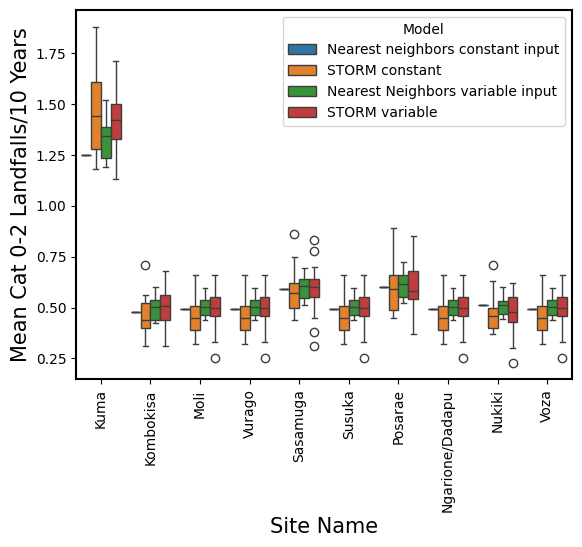

In [33]:
example_site_ensemble_boxplot_figure(all_site_outputs)